* [Factors affeting usa home prices](#(A)-Factors-affecting-US-Home-prices)
    1. [Housing Subsisdies  (Yearly)](#Housing-Subsidies)
    2. [Interest Rates  (Monthly)](#Interest-Rates)
    3. [Unemployment Rate  (Monthly)](#Unemployment-Rate)
    4. [Per Capita GDP  (Monthly)](#Per-Capita-GDP)
    5. [Construction price index  (Monthly)](#Construction-price-index)
    6. [Consumer Price Index (CPI)  (Monthly)](#Consumer-Price-Index-(CPI))
    7. [Monthly New Household  (Monthly)](#Monthly-New-Household)
    8. [Population above 65  (Yearly)](#Population-above-65)
    9. [Urban Population Percentage  (Yearly)](#Urban-Population-Percentage)
    10. [Working Age Population  (Monthly)](#Working-Age-Population)
    11. [Real Median Household Income  (Monthly)](#Real-Median-Household-Income)
    12. [Number of Households  (Yearly)](#Number-of-Households)
    
    
    
    
* [Data Merging](#(B)-Merging-Data)
* [Filling Missing Data](#Filling-Missing-Values)

In [159]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

##  As a proxy to the home prices, S&P CASE-SHILLER Index is used.

In [160]:
#Reading CASE-SHILLER Index into a dataframe
df_CS = pd.read_csv("CSUSHPISA.csv")

#Changing dtype of date column
df_CS["DATE"] = pd.to_datetime(df_CS["DATE"])

#Selecting data post JUNE 2001
mask = df_CS["DATE"] > "2000-12-12"
df_CS = df_CS[mask]

#Resetting Index
df_CS.reset_index(inplace = True)
df_CS.drop(columns = ["index"], inplace = True)

# Creating "Year" and "Month" columns
df_CS["Year"] = pd.DatetimeIndex(df_CS["DATE"]).year
df_CS["Month"] = pd.DatetimeIndex(df_CS["DATE"]).month
print(df_CS.shape)
df_CS.head()

(270, 4)


,DATE,CSUSHPISA,Year,Month
0,2001-01-01,109.846,2001,1
1,2001-02-01,110.499,2001,2
2,2001-03-01,111.108,2001,3
3,2001-04-01,111.651,2001,4
4,2001-05-01,112.163,2001,5


In [161]:
df_CS.tail()

,DATE,CSUSHPISA,Year,Month
265,2023-02-01,296.958,2023,2
266,2023-03-01,298.210,2023,3
267,2023-04-01,300.214,2023,4
268,2023-05-01,302.657,2023,5
269,2023-06-01,304.635,2023,6


In [162]:
df_CS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DATE       270 non-null    datetime64[ns]
 1   CSUSHPISA  270 non-null    float64       
 2   Year       270 non-null    int64         
 3   Month      270 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 8.6 KB


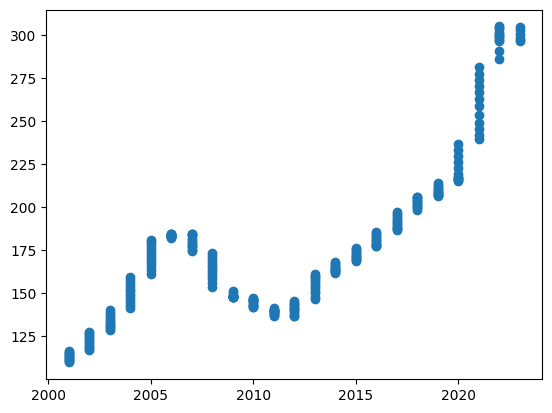

In [163]:
plt.scatter(df_CS["DATE"].dt.year, df_CS["CSUSHPISA"])

# (A) Factors affecting US Home prices

## Housing Subsidies

In [164]:
df_subsidy = pd.read_csv("L312051A027NBEA.csv", names = ["DATE", "Subsidy"], skiprows = 1)
print(df_subsidy.shape)
df_subsidy.head()

(62, 2)


,DATE,Subsidy
0,1960-01-01,0.146
1,1961-01-01,0.159
2,1962-01-01,0.176
3,1963-01-01,0.195
4,1964-01-01,0.210


In [165]:
df_subsidy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     62 non-null     object 
 1   Subsidy  62 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


In [166]:
df_subsidy.isna().sum()

DATE       0
Subsidy    0
dtype: int64

In [167]:
df_subsidy["DATE"] = df_subsidy["DATE"].astype("datetime64[ns]")

In [168]:
df_subsidy = df_subsidy[df_subsidy["DATE"] > '2000-12-12']

In [169]:
df_subsidy.head()

,DATE,Subsidy
41,2001-01-01,20.573
42,2002-01-01,24.183
43,2003-01-01,25.930
44,2004-01-01,27.201
45,2005-01-01,27.651


In [170]:
df_subsidy.dtypes

DATE       datetime64[ns]
Subsidy           float64
dtype: object

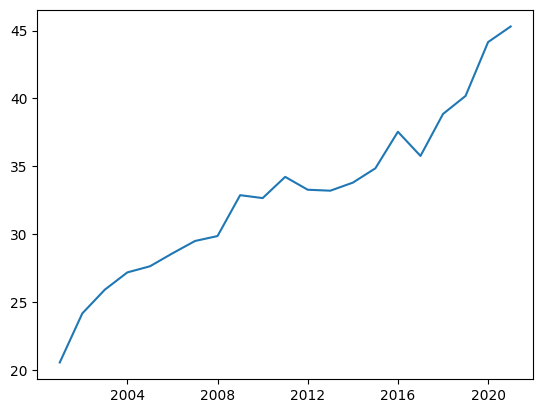

In [171]:
plt.plot(df_subsidy["DATE"], df_subsidy["Subsidy"])

## Interest Rates

In [172]:
# Interest Rate Data
df_Fed_rate = pd.read_csv("FEDFUNDS.csv").drop([252,253])
print(df_Fed_rate.shape)
df_Fed_rate.head()

(828, 2)


,DATE,FEDFUNDS
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83


In [173]:
df_Fed_rate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 828 entries, 0 to 829
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DATE      828 non-null    object 
 1   FEDFUNDS  828 non-null    float64
dtypes: float64(1), object(1)
memory usage: 19.4+ KB


In [174]:
df_Fed_rate["DATE"] = df_Fed_rate["DATE"].astype("datetime64[ns]")

In [175]:
df_Fed_rate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 828 entries, 0 to 829
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DATE      828 non-null    datetime64[ns]
 1   FEDFUNDS  828 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.4 KB


In [176]:
df_Fed_rate.isna().sum()

DATE        0
FEDFUNDS    0
dtype: int64

In [177]:
df_Fed_rate = df_Fed_rate[df_Fed_rate["DATE"] > '2000-12-12']

In [178]:
df_Fed_rate.head()

,DATE,FEDFUNDS
558,2001-01-01,5.98
559,2001-02-01,5.49
560,2001-03-01,5.31
561,2001-04-01,4.80
562,2001-05-01,4.21


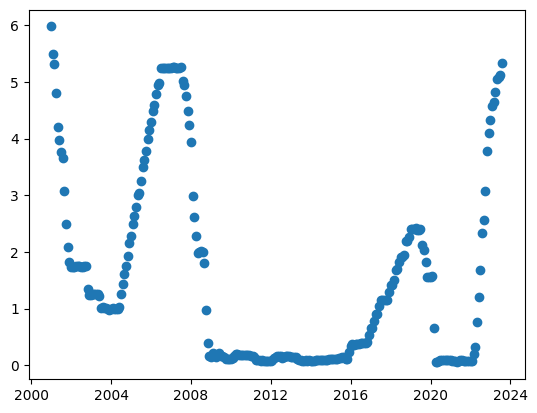

In [179]:
plt.scatter(df_Fed_rate["DATE"], df_Fed_rate["FEDFUNDS"])

## Unemployment Rate

In [180]:
# Reading Unemployment Rate Data into a dataframe
df_unemp = pd.read_csv("UNRATE.csv")
df_unemp.drop([252,253], inplace = True)
print(df_unemp.shape)
df_unemp.head()

(906, 2)


,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [181]:
df_unemp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 906 entries, 0 to 907
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    906 non-null    object 
 1   UNRATE  906 non-null    float64
dtypes: float64(1), object(1)
memory usage: 21.2+ KB


In [182]:
df_unemp.isna().sum()

DATE      0
UNRATE    0
dtype: int64

In [183]:
df_unemp["DATE"] = df_unemp["DATE"].astype("datetime64[ns]")

In [184]:
df_unemp = df_unemp[df_unemp["DATE"] > '2000-12-12']

In [185]:
df_unemp.head()

,DATE,UNRATE
636,2001-01-01,4.2
637,2001-02-01,4.2
638,2001-03-01,4.3
639,2001-04-01,4.4
640,2001-05-01,4.3


In [186]:
df_unemp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272 entries, 636 to 907
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    272 non-null    datetime64[ns]
 1   UNRATE  272 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.4 KB


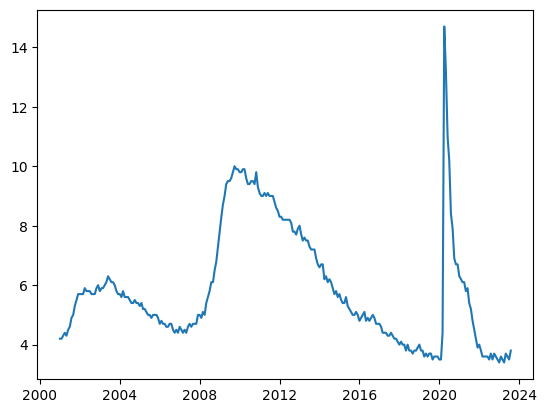

In [187]:
plt.plot(df_unemp["DATE"], df_unemp["UNRATE"])

## Per Capita GDP

In [188]:
# Reading Per Capita GDP Data into a dataframe
df_pcgdp = pd.read_csv("A939RX0Q048SBEA.csv", names = ["DATE", "Per_Capita_GDP"], skiprows = 1)
print(df_pcgdp.shape)
df_pcgdp.head()

(306, 2)


,DATE,Per_Capita_GDP
0,1947-01-01,14213.0
1,1947-04-01,14111.0
2,1947-07-01,14018.0
3,1947-10-01,14171.0
4,1948-01-01,14326.0


In [189]:
df_pcgdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DATE            306 non-null    object 
 1   Per_Capita_GDP  306 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.9+ KB


In [190]:
df_pcgdp.isna().sum()

DATE              0
Per_Capita_GDP    0
dtype: int64

In [191]:
df_pcgdp["DATE"] = df_pcgdp["DATE"].astype("datetime64[ns]")

In [192]:
df_pcgdp = df_pcgdp[df_pcgdp["DATE"] > '2000-12-12']

In [193]:
df_pcgdp.head()

,DATE,Per_Capita_GDP
216,2001-01-01,46519.0
217,2001-04-01,46698.0
218,2001-07-01,46390.0
219,2001-10-01,46400.0
220,2002-01-01,46683.0


In [194]:
df_pcgdp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 216 to 305
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATE            90 non-null     datetime64[ns]
 1   Per_Capita_GDP  90 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.1 KB


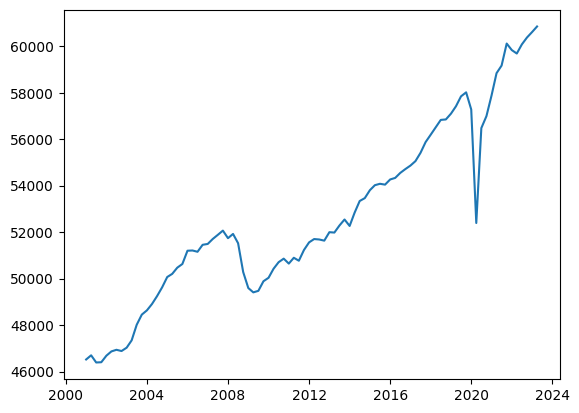

In [195]:
plt.plot(df_pcgdp["DATE"], df_pcgdp["Per_Capita_GDP"])

## Construction price index

In [196]:
# Reading Per Capita GDP Data into a dataframe
df_cons_price_index = pd.read_csv("WPUSI012011.csv", names = ["DATE", "Cons_Materials"], skiprows = 1)
df_cons_price_index.drop([252], inplace = True)
print(df_cons_price_index.shape)
df_cons_price_index.head()

(918, 2)


,DATE,Cons_Materials
0,1947-01-01,22.2
1,1947-02-01,22.5
2,1947-03-01,22.9
3,1947-04-01,23.2
4,1947-05-01,23.3


In [197]:
df_cons_price_index.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 918
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DATE            918 non-null    object 
 1   Cons_Materials  918 non-null    float64
dtypes: float64(1), object(1)
memory usage: 21.5+ KB


In [198]:
df_cons_price_index.isna().sum()

DATE              0
Cons_Materials    0
dtype: int64

In [199]:
df_cons_price_index["DATE"] = df_cons_price_index["DATE"].astype("datetime64[ns]")

In [200]:
df_cons_price_index = df_cons_price_index[df_cons_price_index["DATE"] > '2000-12-12']

In [201]:
df_cons_price_index.head()

,DATE,Cons_Materials
648,2001-01-01,142.0
649,2001-02-01,142.4
650,2001-03-01,142.4
651,2001-04-01,142.5
652,2001-05-01,144.2


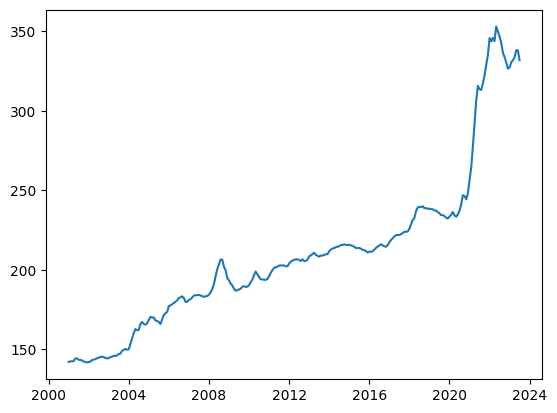

In [202]:
plt.plot(df_cons_price_index["DATE"], df_cons_price_index["Cons_Materials"])

## Consumer Price Index (CPI)

In [203]:
# Consumer Price Index
df_CPI = pd.read_csv("CPIAUCSL.csv", names = ["DATE", "CPI"], skiprows = 1).drop([252])
print(df_CPI.shape)
df_CPI.head()

(918, 2)


,DATE,CPI
0,1947-01-01,21.48
1,1947-02-01,21.62
2,1947-03-01,22.00
3,1947-04-01,22.00
4,1947-05-01,21.95


In [204]:
df_CPI.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 918
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    918 non-null    object 
 1   CPI     918 non-null    float64
dtypes: float64(1), object(1)
memory usage: 21.5+ KB


In [205]:
df_CPI["DATE"] = df_CPI["DATE"].astype("datetime64[ns]")

In [206]:
df_CPI = df_CPI[df_CPI["DATE"] > '2000-12-12']

In [207]:
df_CPI.head(12)

,DATE,CPI
648,2001-01-01,175.6
649,2001-02-01,176.0
650,2001-03-01,176.1
651,2001-04-01,176.4
652,2001-05-01,177.3
653,2001-06-01,177.7
654,2001-07-01,177.4
655,2001-08-01,177.4
656,2001-09-01,178.1
657,2001-10-01,177.6


In [208]:
df_CPI.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271 entries, 648 to 918
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    271 non-null    datetime64[ns]
 1   CPI     271 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.4 KB


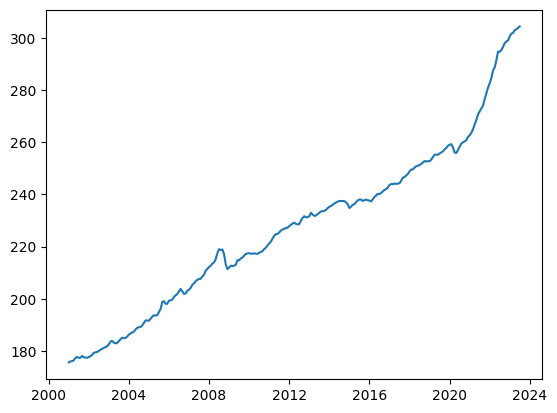

In [209]:
plt.plot(df_CPI["DATE"], df_CPI["CPI"] )

## Monthly New Household

In [210]:
# Monthly new house supply
df_house = pd.read_csv("MSACSR.csv", names = ["DATE", "Houses"], skiprows = 1).drop([252])
print(df_house.shape)
df_house.head()

(726, 2)


,DATE,Houses
0,1963-01-01,4.7
1,1963-02-01,6.6
2,1963-03-01,6.4
3,1963-04-01,5.3
4,1963-05-01,5.1


In [211]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 726 entries, 0 to 726
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    726 non-null    object 
 1   Houses  726 non-null    float64
dtypes: float64(1), object(1)
memory usage: 17.0+ KB


In [212]:
df_house.isna().sum()

DATE      0
Houses    0
dtype: int64

In [213]:
df_house["DATE"] = df_house["DATE"].astype("datetime64[ns]")

In [214]:
df_house = df_house[df_house["DATE"] > '2000-12-12']

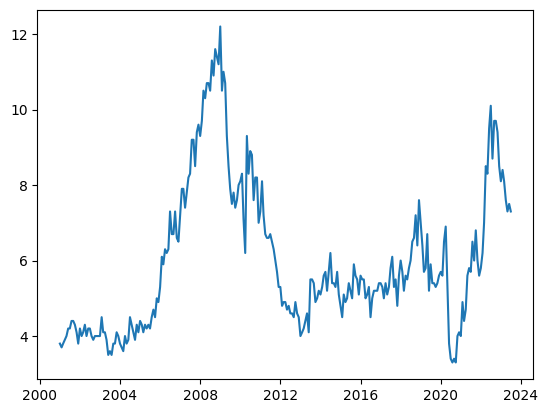

In [215]:
plt.plot(df_house["DATE"], df_house["Houses"])

## Population above 65

In [216]:
# Population above 65

df_oldpop = pd.read_csv("SPPOP65UPTOZSUSA.csv", names = ["DATE", "old_percent"], skiprows = 1)
print(df_oldpop.shape)
df_oldpop.tail()


(63, 2)


,DATE,old_percent
58,2018-01-01,15.397698
59,2019-01-01,15.791801
60,2020-01-01,16.223400
61,2021-01-01,16.678895
62,2022-01-01,17.128121


In [217]:
df_oldpop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE         63 non-null     object 
 1   old_percent  63 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


In [218]:
df_oldpop["DATE"] = df_oldpop["DATE"].astype("datetime64[ns]")

In [219]:
df_oldpop = df_oldpop[df_oldpop["DATE"] > '2000-12-12']

In [220]:
df_oldpop.head()

,DATE,old_percent
41,2001-01-01,12.296945
42,2002-01-01,12.287458
43,2003-01-01,12.277934
44,2004-01-01,12.304719
45,2005-01-01,12.360163


In [221]:
df_oldpop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 41 to 62
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE         22 non-null     datetime64[ns]
 1   old_percent  22 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 528.0 bytes


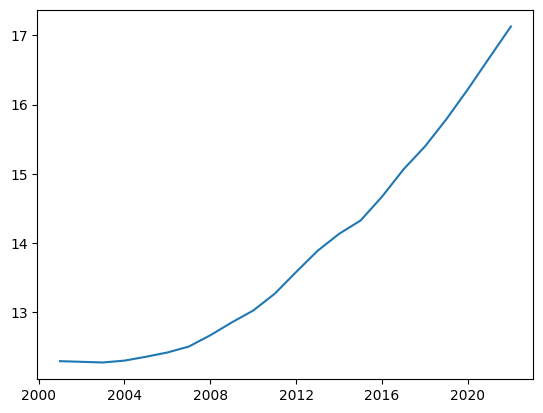

In [222]:
plt.plot(df_oldpop.DATE, df_oldpop.old_percent)

## Urban Population Percentage

In [223]:
# to read just one sheet to dataframe:
df_urban = pd.read_csv("API_SP.URB.TOTL.IN.ZS_DS2_en_csv_v2_5734574.csv")

print(df_urban.shape)
df_urban.head()


(266, 68)


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.776000,50.761000,50.746000,50.730000,50.715000,50.700000,...,43.041000,43.108000,43.192000,43.293000,43.411000,43.546000,43.697000,43.866000,44.052000,NaN
1,Africa Eastern and Southern,AFE,Urban population (% of total population),SP.URB.TOTL.IN.ZS,14.563810,14.811410,15.069249,15.347976,15.640195,15.941282,...,33.936963,34.425584,34.894753,35.358901,35.847598,36.336259,36.828302,37.323699,37.824593,NaN
2,Afghanistan,AFG,Urban population (% of total population),SP.URB.TOTL.IN.ZS,8.401000,8.684000,8.976000,9.276000,9.586000,9.904000,...,24.587000,24.803000,25.020000,25.250000,25.495000,25.754000,26.026000,26.314000,26.616000,NaN
3,Africa Western and Central,AFW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,14.705391,15.090123,15.484076,15.897592,16.329208,16.778650,...,44.180175,44.805863,45.425066,46.039478,46.649426,47.255413,47.857831,48.454806,49.047385,NaN
4,Angola,AGO,Urban population (% of total population),SP.URB.TOTL.IN.ZS,10.435000,10.798000,11.204000,11.624000,12.058000,12.504000,...,62.731000,63.446000,64.149000,64.839000,65.514000,66.177000,66.825000,67.460000,68.081000,NaN


In [224]:
df_urban = df_urban[df_urban["Country Name"] == "United States"]
df_urban.drop(labels = ["Country Name", "Country Code", "Indicator Code"], axis = 1, inplace = True)
df_urban.set_index("Indicator Name", inplace = True)
df_urban = df_urban.T
df_urban.reset_index(inplace = True)
df_urban = df_urban[:-1]
df_urban.head()

Indicator Name,index,Urban population (% of total population)
0,1960,69.996
1,1961,70.377
2,1962,70.757
3,1963,71.134
4,1964,71.508


In [225]:
df_urban.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   index                                     63 non-null     object 
 1   Urban population (% of total population)  63 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


In [226]:
df_urban['DATE'] = pd.to_datetime(df_urban['index'])

In [227]:
df_urban = df_urban[df_urban["DATE"] > '2000-12-12']

In [228]:
df_urban = df_urban.iloc[:,1:]

In [229]:
df_urban.head()


Indicator Name,Urban population (% of total population),DATE
41,79.234,2001-01-01
42,79.409,2002-01-01
43,79.583,2003-01-01
44,79.757,2004-01-01
45,79.928,2005-01-01


In [230]:
df_urban.reset_index(drop = True, inplace = True)

In [231]:
df_urban = df_urban[["DATE", "Urban population (% of total population)"]]

In [232]:
df_urban.head()

Indicator Name,DATE,Urban population (% of total population)
0,2001-01-01,79.234
1,2002-01-01,79.409
2,2003-01-01,79.583
3,2004-01-01,79.757
4,2005-01-01,79.928


In [233]:
df_urban.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   DATE                                      22 non-null     datetime64[ns]
 1   Urban population (% of total population)  22 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 480.0 bytes


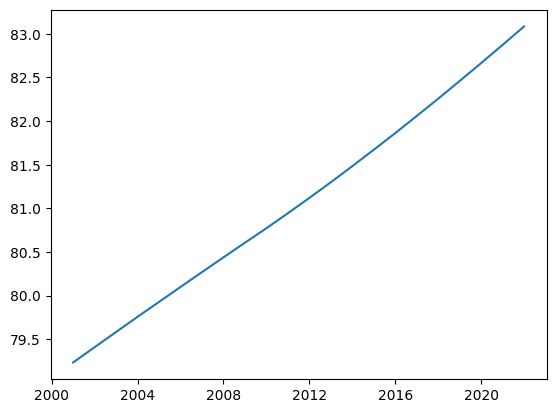

In [234]:
plt.plot(df_urban["DATE"], df_urban["Urban population (% of total population)"])

In [235]:
df_urban.shape

(22, 2)

## Working Age Population

In [236]:
# Working age population
df_working = pd.read_csv("LFWA64TTUSM647S.csv", names = ["DATE", "Working_Population"], skiprows = 1).drop([252])
print(df_working.shape)
df_working.tail()

(557, 2)


,DATE,Working_Population
553,2023-02-01,2.082332e+08
554,2023-03-01,2.082733e+08
555,2023-04-01,2.083870e+08
556,2023-05-01,2.086116e+08
557,2023-06-01,2.087162e+08


In [237]:
df_working.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 557 entries, 0 to 557
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DATE                557 non-null    object 
 1   Working_Population  557 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.1+ KB


In [238]:
df_working["DATE"] = pd.to_datetime(df_working["DATE"])

In [239]:
df_working = df_working[df_working["DATE"].dt.strftime('%Y') > '2000-12-12']

In [240]:
df_working = df_working[["DATE", "Working_Population"]]

In [241]:
df_working.head()

,DATE,Working_Population
288,2001-01-01,1.804137e+08
289,2001-02-01,1.805735e+08
290,2001-03-01,1.806312e+08
291,2001-04-01,1.809035e+08
292,2001-05-01,1.810147e+08


In [242]:
df_working.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270 entries, 288 to 557
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   DATE                270 non-null    datetime64[ns]
 1   Working_Population  270 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 KB


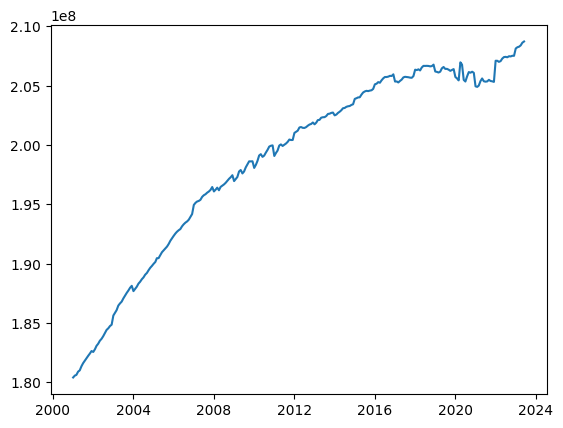

In [243]:
plt.plot(df_working.DATE, df_working.Working_Population)

## Real Median Household Income

In [244]:
# Real Median Household Income
df_income = pd.read_csv("DSPIC96.csv", names = ["DATE", "Income"], skiprows = 1)
print(df_income.shape)
df_income.head()

(775, 2)


,DATE,Income
0,1959-01-01,2191.5
1,1959-02-01,2198.1
2,1959-03-01,2210.7
3,1959-04-01,2225.0
4,1959-05-01,2237.1


In [245]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775 entries, 0 to 774
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    775 non-null    object 
 1   Income  775 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.2+ KB


In [246]:
df_income["DATE"] = df_income['DATE'].astype('datetime64[ns]')

In [247]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775 entries, 0 to 774
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    775 non-null    datetime64[ns]
 1   Income  775 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.2 KB


In [248]:
df_income = df_income[df_income["DATE"] > '2000-12-12']

In [249]:
df_income.head()

,DATE,Income
504,2001-01-01,9697.4
505,2001-02-01,9708.8
506,2001-03-01,9733.9
507,2001-04-01,9705.0
508,2001-05-01,9680.9


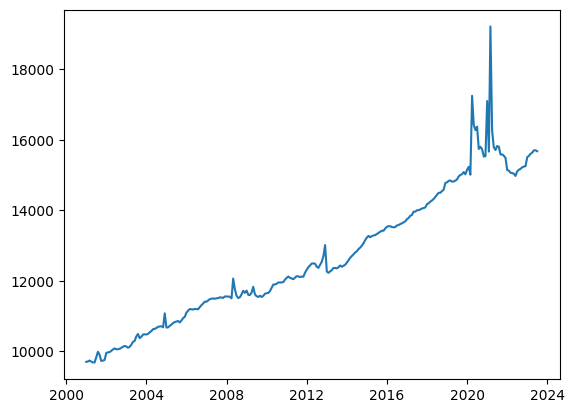

In [250]:
plt.plot(df_income.DATE, df_income.Income)

## Number of Households

In [251]:
# Number of households

df_households = pd.read_csv("TTLHH.csv", names = ["DATE", "Num_Households"], skiprows = 1)
print(df_households.shape)
df_households

(83, 2)


,DATE,Num_Households
0,1940-01-01,34949
1,1941-01-01,.
2,1942-01-01,.
3,1943-01-01,.
4,1944-01-01,.
...,...,...
78,2018-01-01,127586
79,2019-01-01,128579.0
80,2020-01-01,128451.0
81,2021-01-01,129224.0


In [252]:
df_households.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DATE            83 non-null     object
 1   Num_Households  83 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [253]:
df_households["DATE"] = df_households["DATE"].astype('datetime64[ns]')

In [254]:
df_households.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATE            83 non-null     datetime64[ns]
 1   Num_Households  83 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 1.4+ KB


In [255]:
df_households = df_households[df_households["DATE"] > '2000-12-12']

In [256]:
df_households.head()

,DATE,Num_Households
61,2001-01-01,108209
62,2002-01-01,109297
63,2003-01-01,111278
64,2004-01-01,112000
65,2005-01-01,113343


In [257]:
df_households["Num_Households"].values

array(['108209', '109297', '111278', '112000', '113343', '114384',
       '116011', '116783', '117181', '117538', '119927', '121084',
       '122459', '123229', '124587', '125819', '126224', '127586',
       '128579.0', '128451.0', '129224.0', '131202.0'], dtype=object)

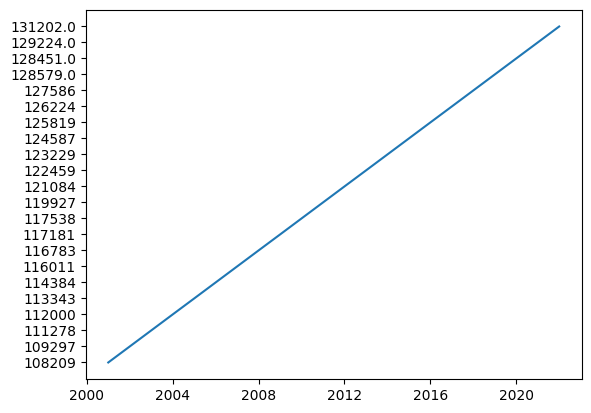

In [258]:
plt.plot(df_households["DATE"], df_households["Num_Households"])

# (B) Merging Data

Merging Monthly data (outer join) so all the dates are covered month-wise

In [259]:
# Concating dataframes having monthly data to create one dataframe
df = pd.DataFrame()
df_bymonth = [df_CS,df_pcgdp, df_working, df_house, df_CPI, df_unemp, df_cons_price_index, df_Fed_rate, df_income]
for df1 in df_bymonth:
    df1 = df1.set_index("DATE")
    df = pd.concat([df,df1],join ="outer", axis = 1)
print(df.shape)
df.head()

(272, 11)


,CSUSHPISA,Year,Month,Per_Capita_GDP,Working_Population,Houses,CPI,UNRATE,Cons_Materials,FEDFUNDS,Income
DATE,,,,,,,,,,,
2001-01-01,109.846,2001.0,1.0,46519.0,1.804137e+08,3.8,175.6,4.2,142.0,5.98,9697.4
2001-02-01,110.499,2001.0,2.0,NaN,1.805735e+08,3.7,176.0,4.2,142.4,5.49,9708.8
2001-03-01,111.108,2001.0,3.0,NaN,1.806312e+08,3.8,176.1,4.3,142.4,5.31,9733.9
2001-04-01,111.651,2001.0,4.0,46698.0,1.809035e+08,3.9,176.4,4.4,142.5,4.80,9705.0
2001-05-01,112.163,2001.0,5.0,NaN,1.810147e+08,4.0,177.3,4.3,144.2,4.21,9680.9


In [260]:
df.tail()

,CSUSHPISA,Year,Month,Per_Capita_GDP,Working_Population,Houses,CPI,UNRATE,Cons_Materials,FEDFUNDS,Income
DATE,,,,,,,,,,,
2023-04-01,300.214,2023.0,4.0,60852.0,2.083870e+08,7.6,302.918,3.4,333.549,4.83,15633.0
2023-05-01,302.657,2023.0,5.0,NaN,2.086116e+08,7.3,303.294,3.7,338.154,5.06,15697.7
2023-06-01,304.635,2023.0,6.0,NaN,2.087162e+08,7.5,303.841,3.6,337.953,5.08,15701.3
2023-07-01,NaN,NaN,NaN,NaN,NaN,7.3,304.348,3.5,331.786,5.12,15673.5
2023-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.8,NaN,5.33,NaN


In [261]:
df.isna().sum()

CSUSHPISA               2
Year                    2
Month                   2
Per_Capita_GDP        182
Working_Population      2
Houses                  1
CPI                     1
UNRATE                  0
Cons_Materials          1
FEDFUNDS                0
Income                  1
dtype: int64

In [262]:
# Merging other dataframes
others = [df_urban, df_oldpop, df_subsidy,df_households]
for df1 in others:
    if "Year" not in df1.columns:
        df1["Year"] = pd.DatetimeIndex(df1["DATE"]).year
        df1.set_index("DATE", inplace = True)
        df = pd.merge(df, df1, how = "left", on = "Year")
    else:
        df1.set_index("DATE", inplace = True)
        df = pd.merge(df, df1, how = "left", on = "Year")
df["DATE"] = df_CS["DATE"]
df.set_index("DATE", inplace = True)
df.head()

<ipython-input-262-6974a0ee22cc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Year"] = pd.DatetimeIndex(df1["DATE"]).year


,CSUSHPISA,Year,Month,Per_Capita_GDP,Working_Population,Houses,CPI,UNRATE,Cons_Materials,FEDFUNDS,Income,Urban population (% of total population),old_percent,Subsidy,Num_Households
DATE,,,,,,,,,,,,,,,
2001-01-01,109.846,2001.0,1.0,46519.0,1.804137e+08,3.8,175.6,4.2,142.0,5.98,9697.4,79.234,12.296945,20.573,108209
2001-02-01,110.499,2001.0,2.0,NaN,1.805735e+08,3.7,176.0,4.2,142.4,5.49,9708.8,79.234,12.296945,20.573,108209
2001-03-01,111.108,2001.0,3.0,NaN,1.806312e+08,3.8,176.1,4.3,142.4,5.31,9733.9,79.234,12.296945,20.573,108209
2001-04-01,111.651,2001.0,4.0,46698.0,1.809035e+08,3.9,176.4,4.4,142.5,4.80,9705.0,79.234,12.296945,20.573,108209
2001-05-01,112.163,2001.0,5.0,NaN,1.810147e+08,4.0,177.3,4.3,144.2,4.21,9680.9,79.234,12.296945,20.573,108209


In [263]:
df.tail()

,CSUSHPISA,Year,Month,Per_Capita_GDP,Working_Population,Houses,CPI,UNRATE,Cons_Materials,FEDFUNDS,Income,Urban population (% of total population),old_percent,Subsidy,Num_Households
DATE,,,,,,,,,,,,,,,
2023-04-01,300.214,2023.0,4.0,60852.0,2.083870e+08,7.6,302.918,3.4,333.549,4.83,15633.0,NaN,NaN,NaN,NaN
2023-05-01,302.657,2023.0,5.0,NaN,2.086116e+08,7.3,303.294,3.7,338.154,5.06,15697.7,NaN,NaN,NaN,NaN
2023-06-01,304.635,2023.0,6.0,NaN,2.087162e+08,7.5,303.841,3.6,337.953,5.08,15701.3,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,7.3,304.348,3.5,331.786,5.12,15673.5,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.8,NaN,5.33,NaN,NaN,NaN,NaN,NaN


In [264]:
df.isna().sum()

CSUSHPISA                                     2
Year                                          2
Month                                         2
Per_Capita_GDP                              182
Working_Population                            2
Houses                                        1
CPI                                           1
UNRATE                                        0
Cons_Materials                                1
FEDFUNDS                                      0
Income                                        1
Urban population (% of total population)      8
old_percent                                   8
Subsidy                                      20
Num_Households                                8
dtype: int64

# (C) Filling Missing Values

In [265]:
# Filling missing values in the Per_Capita_GDP column using linear interpolation
df["Per_Capita_GDP"] = df["Per_Capita_GDP"].interpolate()

In [266]:
df.head()

,CSUSHPISA,Year,Month,Per_Capita_GDP,Working_Population,Houses,CPI,UNRATE,Cons_Materials,FEDFUNDS,Income,Urban population (% of total population),old_percent,Subsidy,Num_Households
DATE,,,,,,,,,,,,,,,
2001-01-01,109.846,2001.0,1.0,46519.000000,1.804137e+08,3.8,175.6,4.2,142.0,5.98,9697.4,79.234,12.296945,20.573,108209
2001-02-01,110.499,2001.0,2.0,46578.666667,1.805735e+08,3.7,176.0,4.2,142.4,5.49,9708.8,79.234,12.296945,20.573,108209
2001-03-01,111.108,2001.0,3.0,46638.333333,1.806312e+08,3.8,176.1,4.3,142.4,5.31,9733.9,79.234,12.296945,20.573,108209
2001-04-01,111.651,2001.0,4.0,46698.000000,1.809035e+08,3.9,176.4,4.4,142.5,4.80,9705.0,79.234,12.296945,20.573,108209
2001-05-01,112.163,2001.0,5.0,46595.333333,1.810147e+08,4.0,177.3,4.3,144.2,4.21,9680.9,79.234,12.296945,20.573,108209


In [267]:
df.shape

(272, 15)

In [268]:
df.dropna(inplace = True)

In [269]:
df.isna().sum()

CSUSHPISA                                   0
Year                                        0
Month                                       0
Per_Capita_GDP                              0
Working_Population                          0
Houses                                      0
CPI                                         0
UNRATE                                      0
Cons_Materials                              0
FEDFUNDS                                    0
Income                                      0
Urban population (% of total population)    0
old_percent                                 0
Subsidy                                     0
Num_Households                              0
dtype: int64

In [270]:
df.shape

(252, 15)

In [271]:
df.tail()

,CSUSHPISA,Year,Month,Per_Capita_GDP,Working_Population,Houses,CPI,UNRATE,Cons_Materials,FEDFUNDS,Income,Urban population (% of total population),old_percent,Subsidy,Num_Households
DATE,,,,,,,,,,,,,,,
2021-08-01,267.005,2021.0,8.0,59485.000000,2.053518e+08,6.5,272.870,5.2,313.083,0.09,15802.4,82.873,16.678895,45.296,129224.0
2021-09-01,270.523,2021.0,9.0,59801.000000,2.054841e+08,6.0,274.028,4.8,317.136,0.08,15580.2,82.873,16.678895,45.296,129224.0
2021-10-01,273.931,2021.0,10.0,60117.000000,2.053873e+08,6.8,276.522,4.5,322.120,0.08,15584.9,82.873,16.678895,45.296,129224.0
2021-11-01,277.284,2021.0,11.0,60023.333333,2.053600e+08,6.0,278.711,4.2,328.940,0.08,15543.5,82.873,16.678895,45.296,129224.0
2021-12-01,281.266,2021.0,12.0,59929.666667,2.053107e+08,5.6,280.887,3.9,335.032,0.08,15483.6,82.873,16.678895,45.296,129224.0


In [272]:
df.shape

(252, 15)

# (D) Exploratory Data Analysis (EDA)

In [273]:
df.to_csv("prepared_dataset.csv")

In [274]:
df= pd.read_csv("prepared_dataset.csv").set_index("DATE")
df.tail()

,CSUSHPISA,Year,Month,Per_Capita_GDP,Working_Population,Houses,CPI,UNRATE,Cons_Materials,FEDFUNDS,Income,Urban population (% of total population),old_percent,Subsidy,Num_Households
DATE,,,,,,,,,,,,,,,
2021-08-01,267.005,2021.0,8.0,59485.000000,2.053518e+08,6.5,272.870,5.2,313.083,0.09,15802.4,82.873,16.678895,45.296,129224.0
2021-09-01,270.523,2021.0,9.0,59801.000000,2.054841e+08,6.0,274.028,4.8,317.136,0.08,15580.2,82.873,16.678895,45.296,129224.0
2021-10-01,273.931,2021.0,10.0,60117.000000,2.053873e+08,6.8,276.522,4.5,322.120,0.08,15584.9,82.873,16.678895,45.296,129224.0
2021-11-01,277.284,2021.0,11.0,60023.333333,2.053600e+08,6.0,278.711,4.2,328.940,0.08,15543.5,82.873,16.678895,45.296,129224.0
2021-12-01,281.266,2021.0,12.0,59929.666667,2.053107e+08,5.6,280.887,3.9,335.032,0.08,15483.6,82.873,16.678895,45.296,129224.0


In [275]:
df.drop(columns = ["Year", "Month"], inplace = True)

**Univariate Analysis**

CSUSHPISA
Skew : 0.78


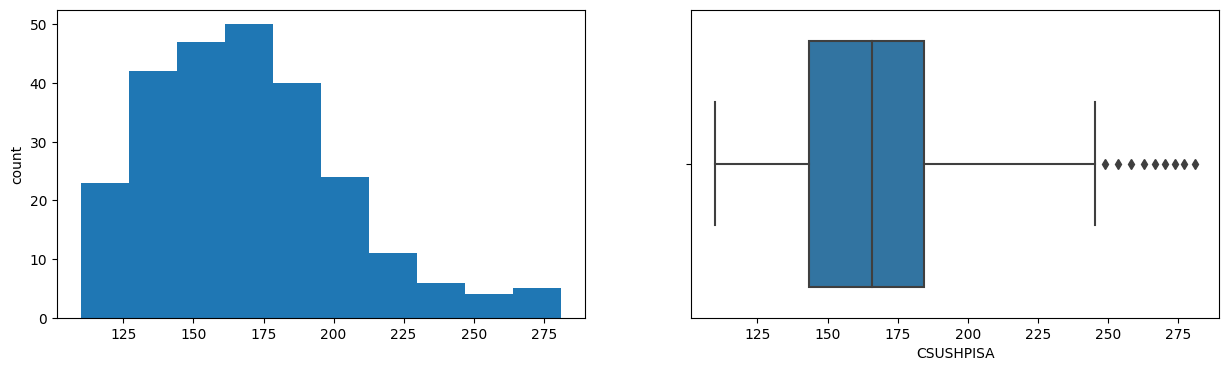

Per_Capita_GDP
Skew : 0.28


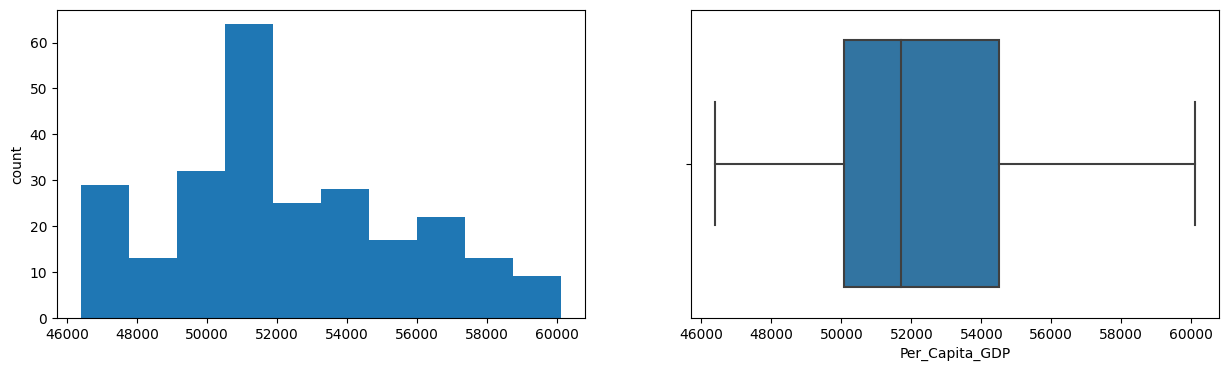

Working_Population
Skew : -0.75


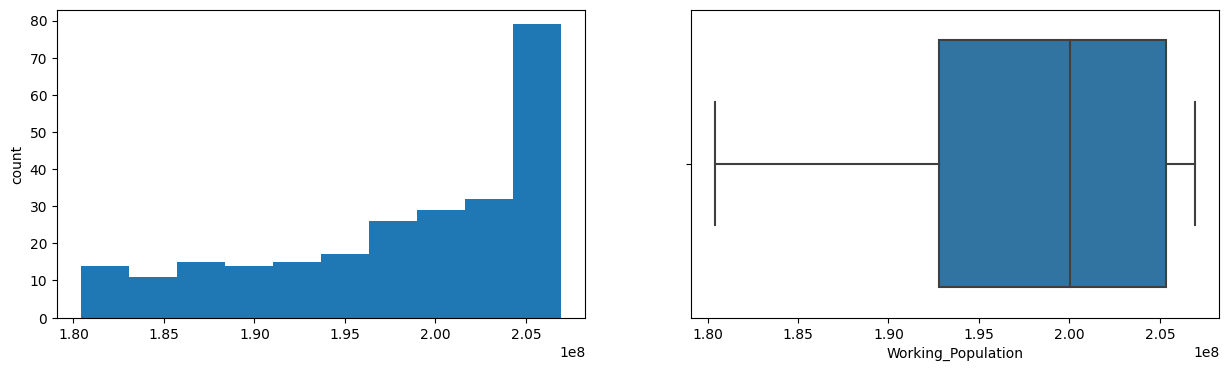

Houses
Skew : 1.25


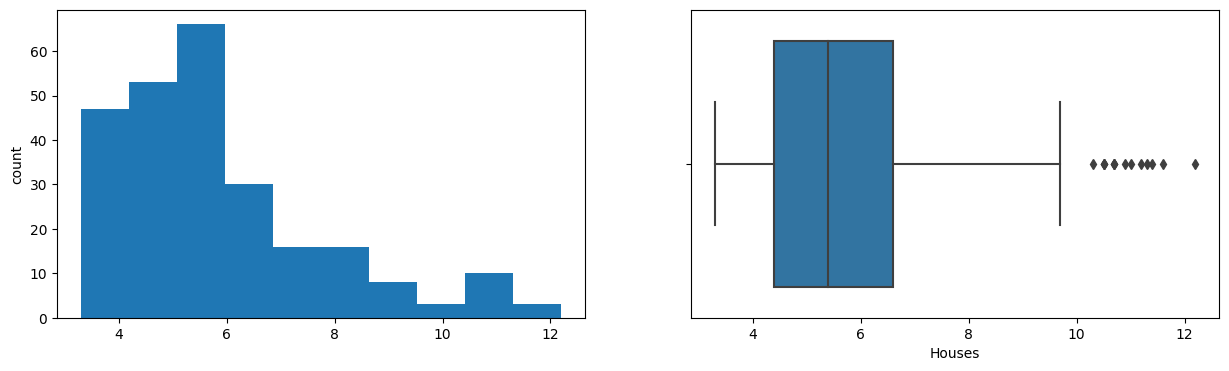

CPI
Skew : -0.08


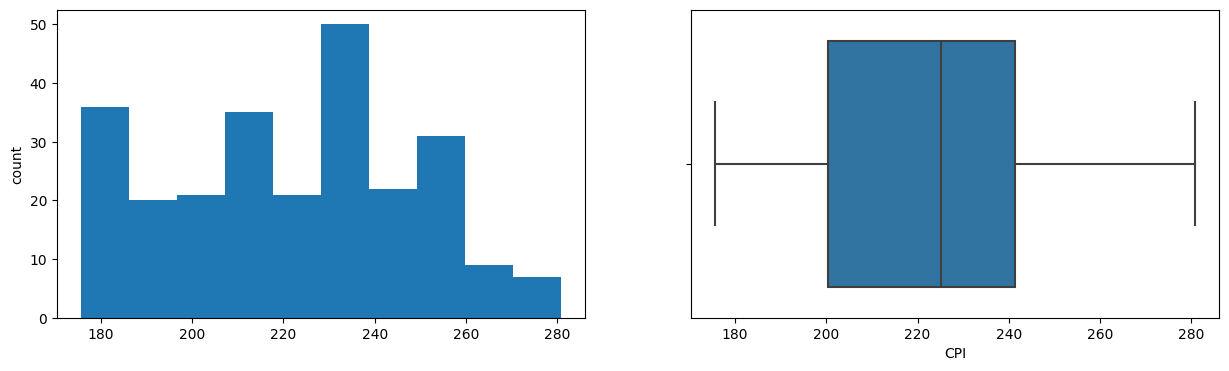

UNRATE
Skew : 1.15


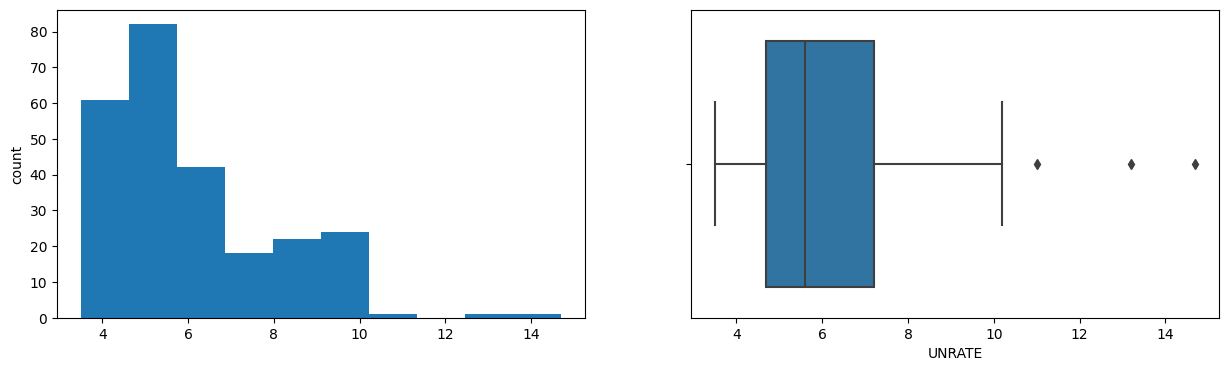

Cons_Materials
Skew : 0.77


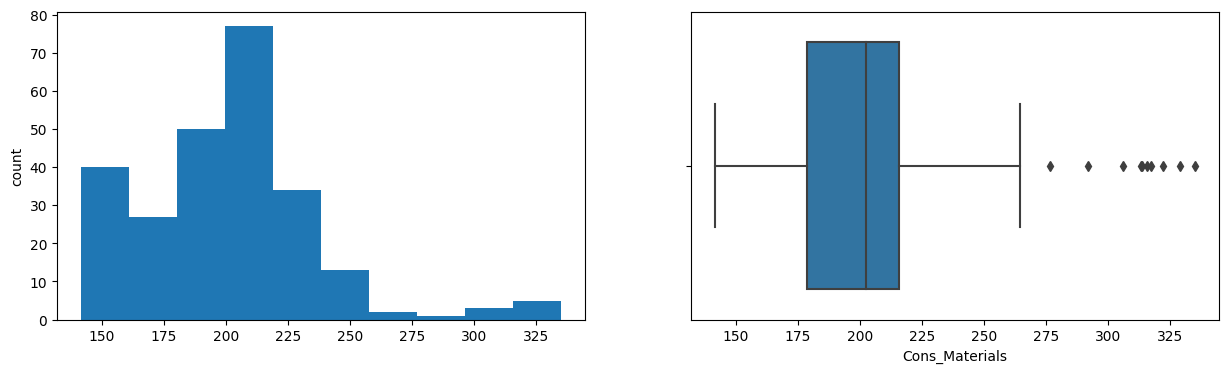

FEDFUNDS
Skew : 1.21


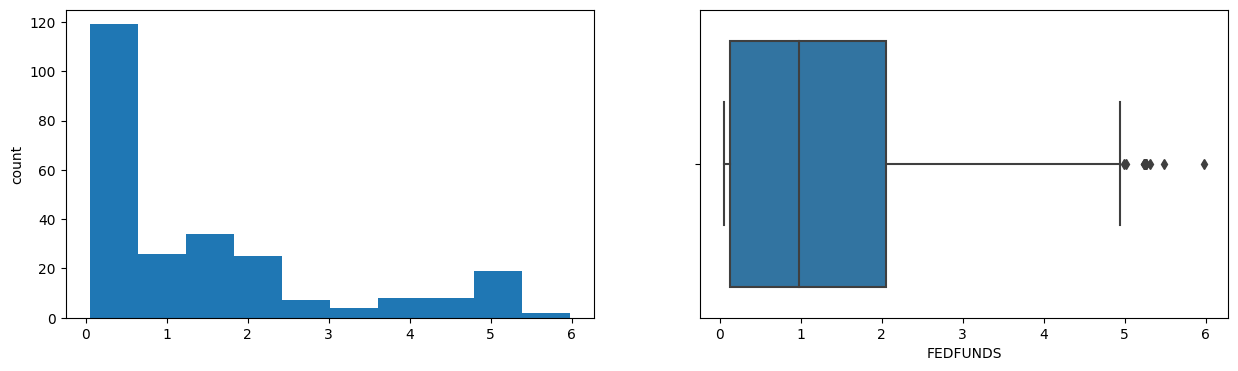

Income
Skew : 0.63


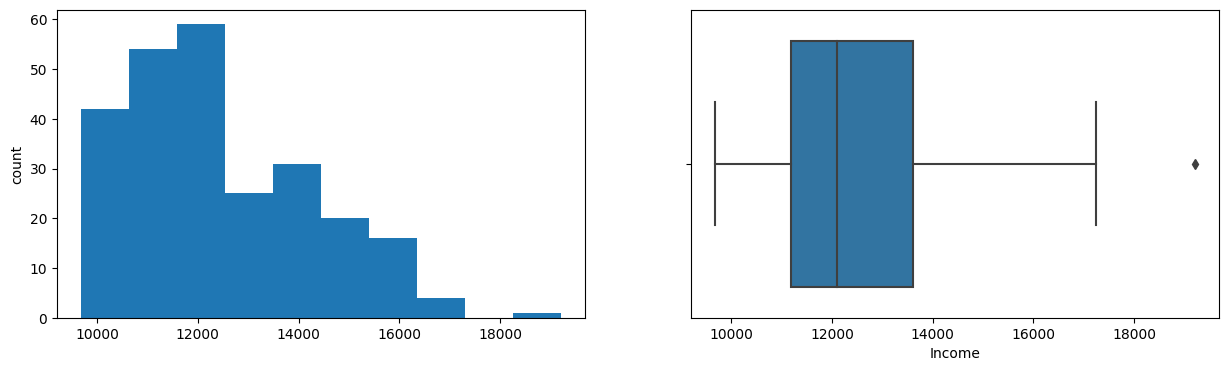

Urban population (% of total population)
Skew : 0.09


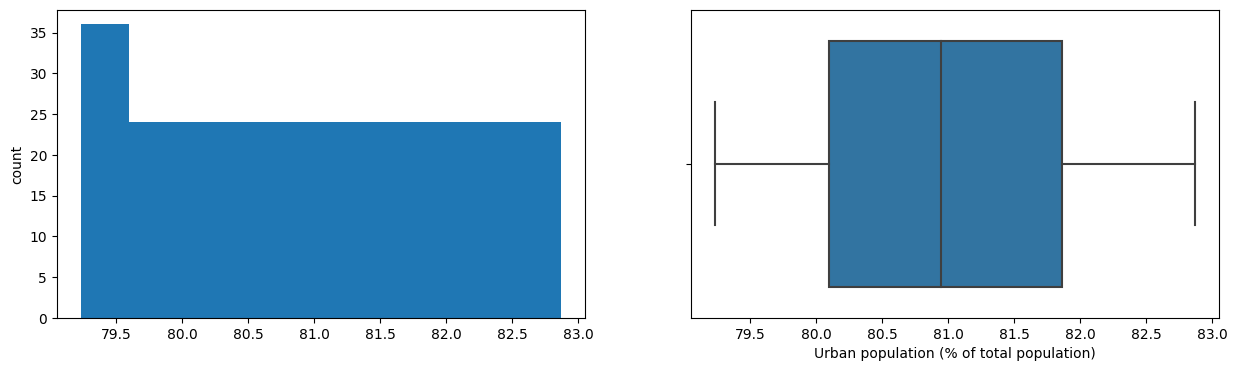

old_percent
Skew : 0.68


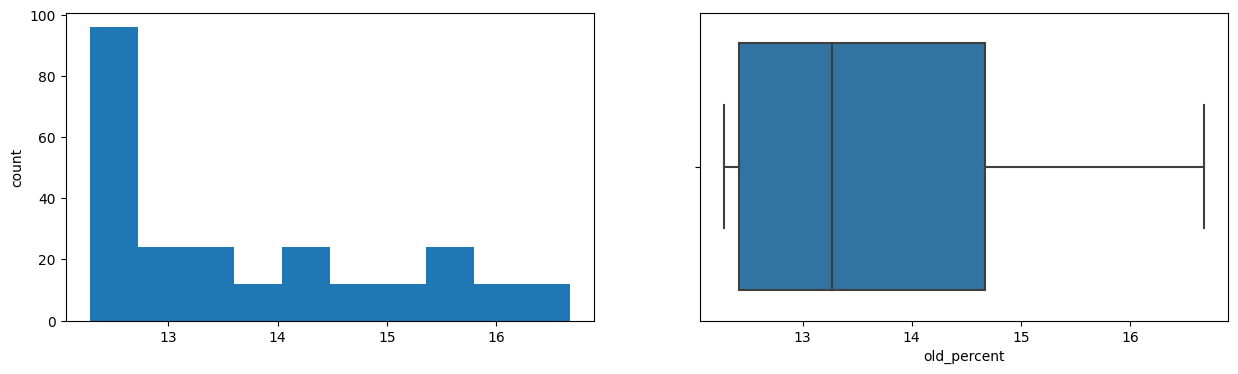

Subsidy
Skew : 0.16


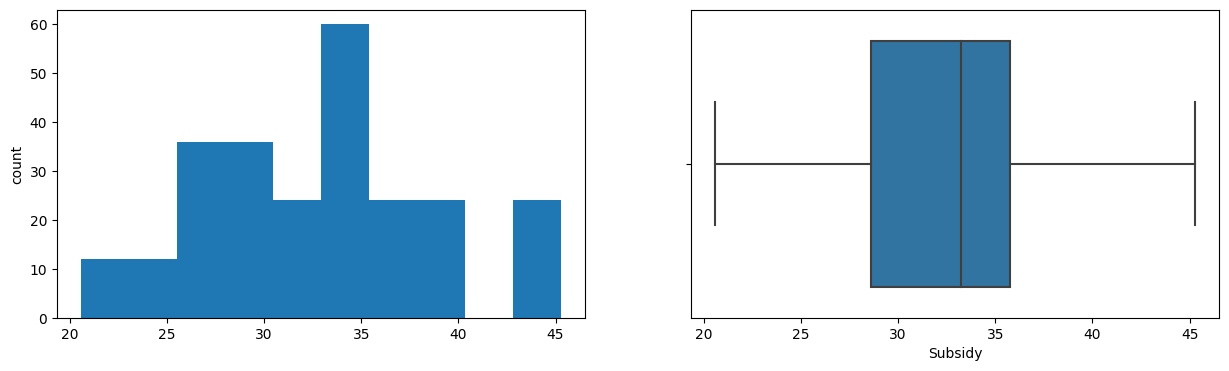

Num_Households
Skew : -0.12


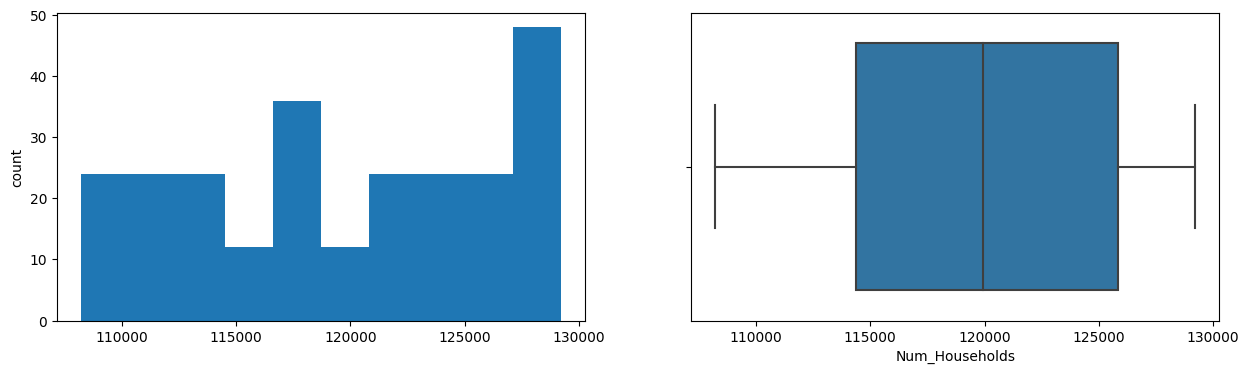

In [276]:
for col in df.columns:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

**Bi-variate Analysis**

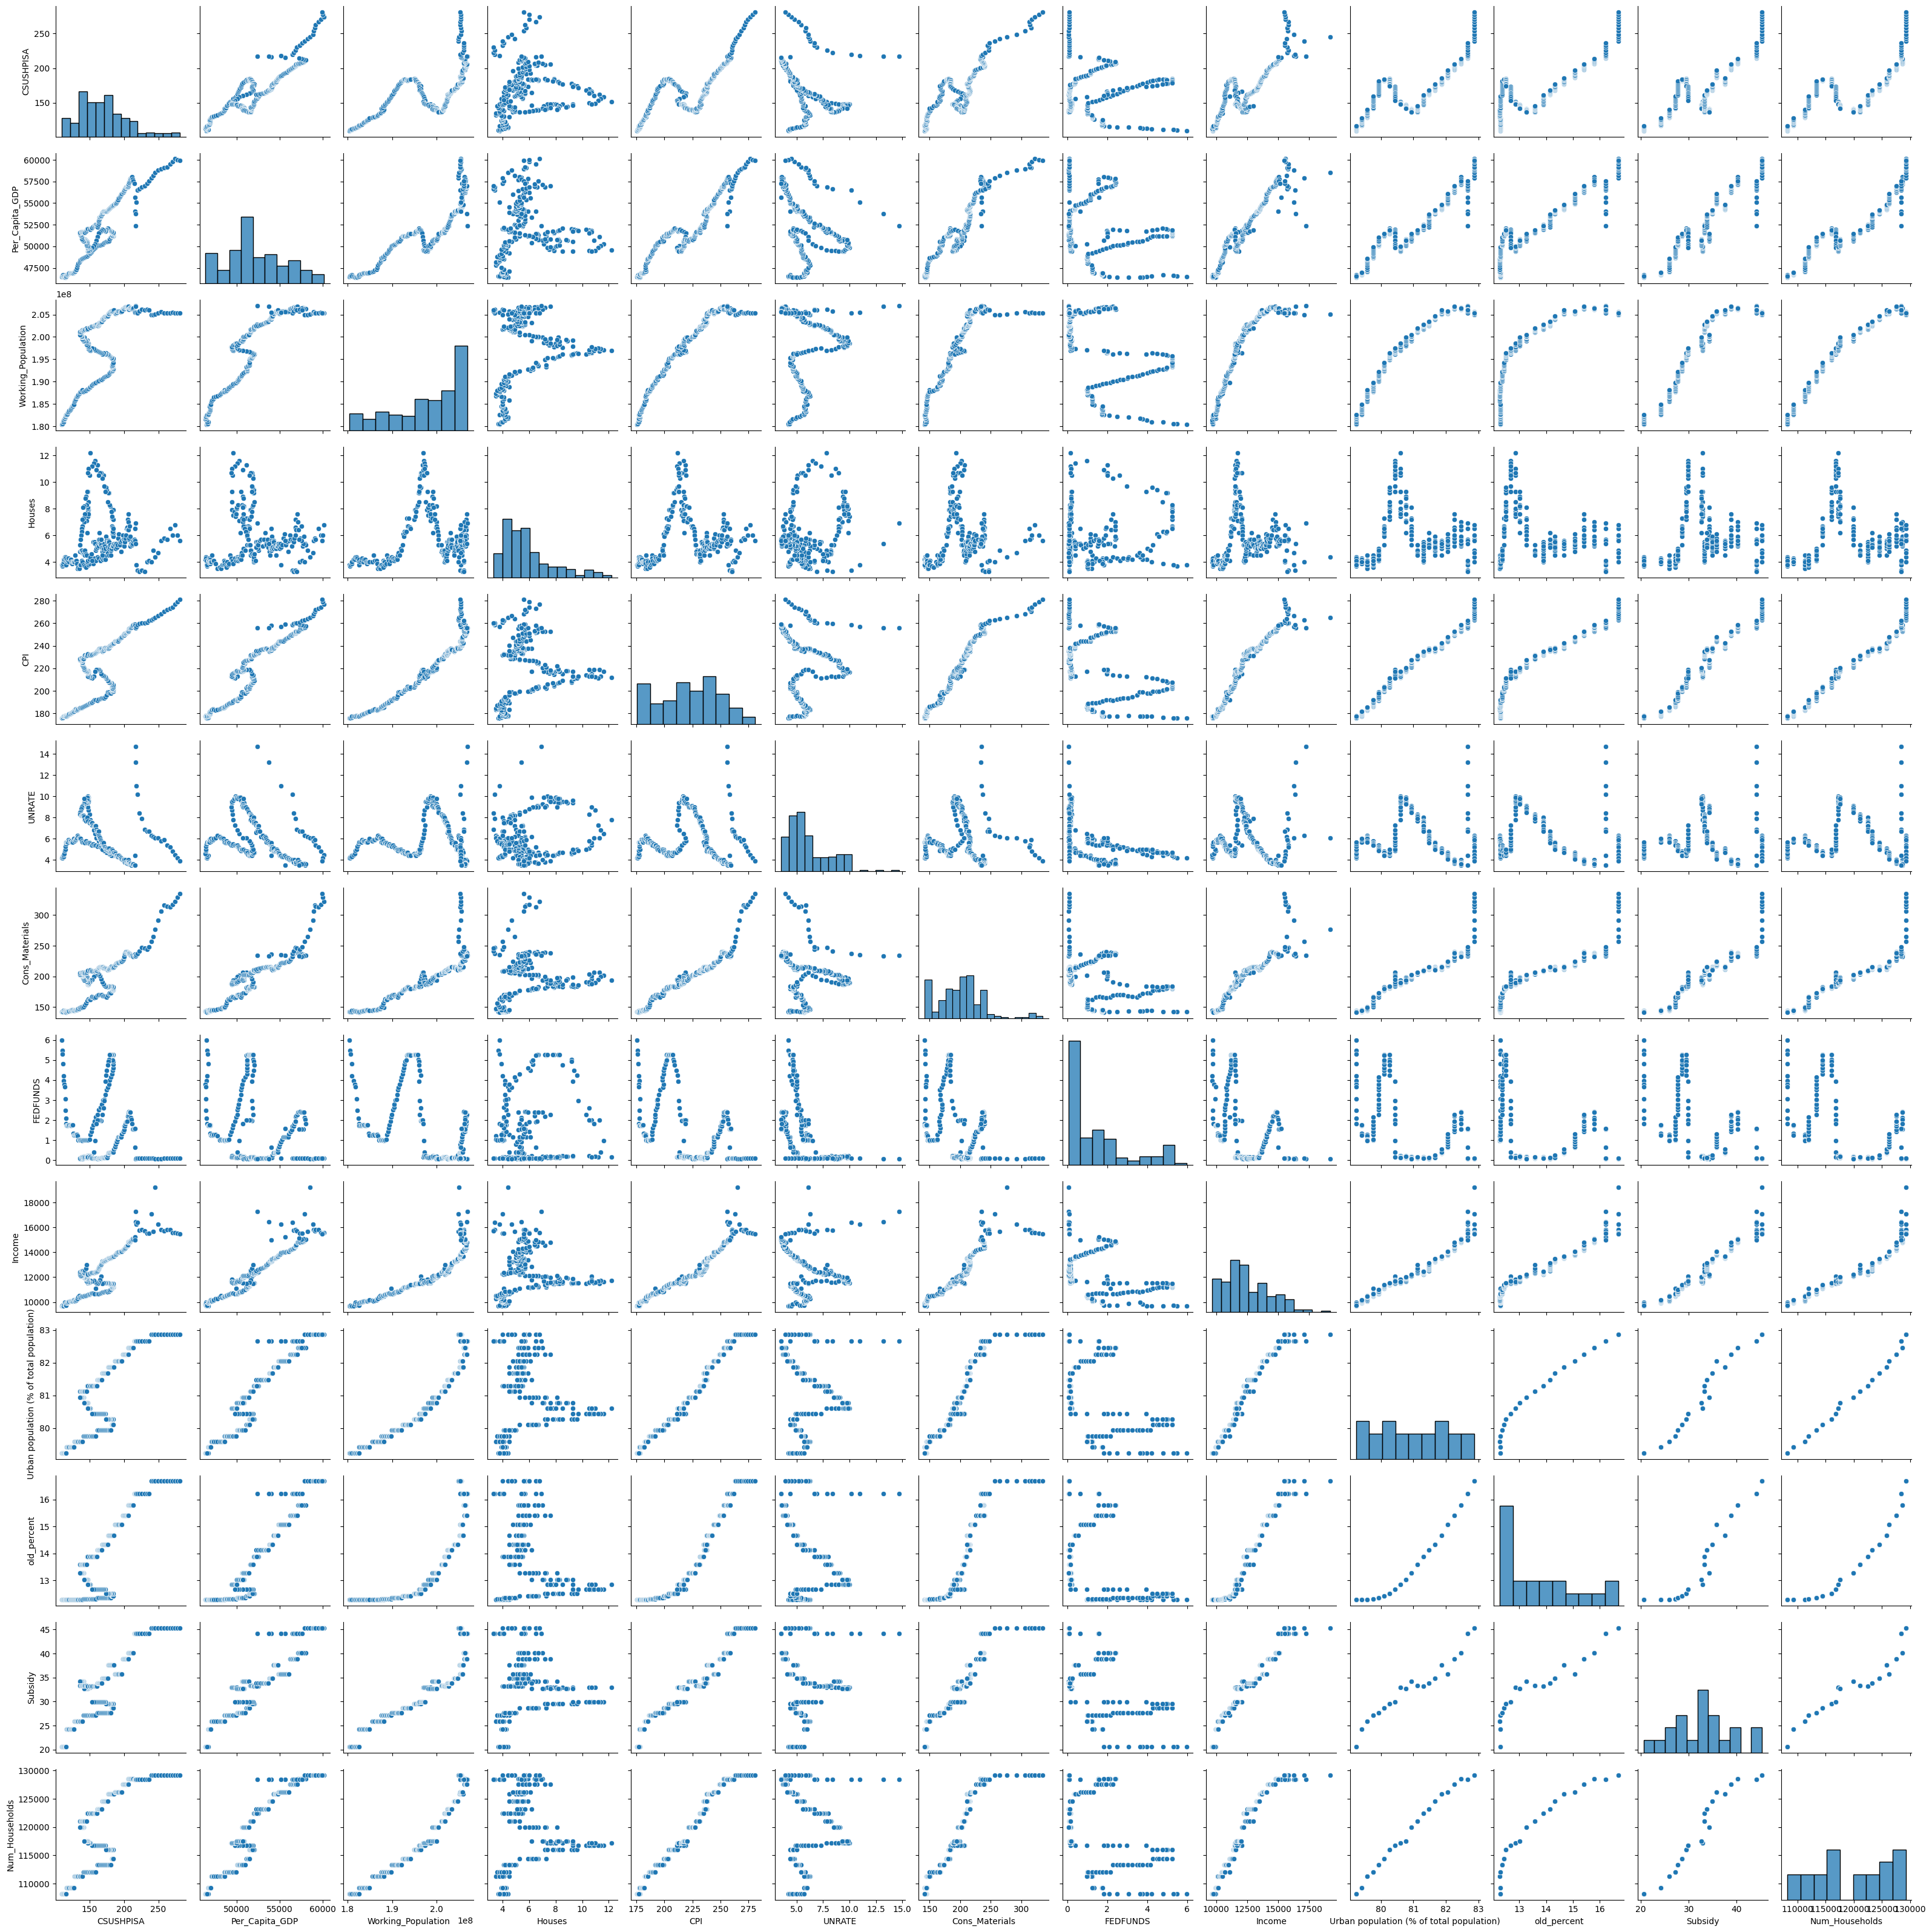

In [277]:
sns.pairplot(df)

In [278]:
# Separating the target variable and the independent variable
y = df.pop("CSUSHPISA")
X = df

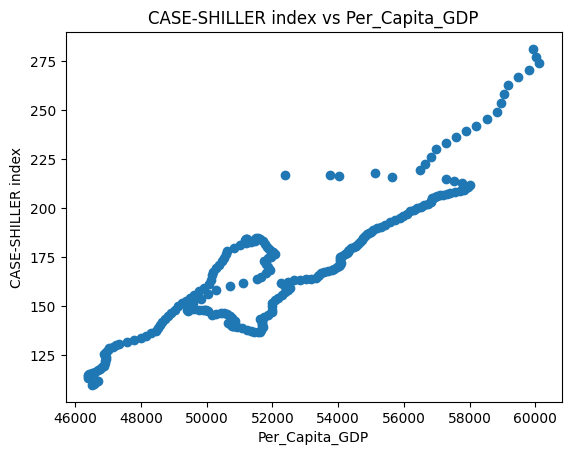

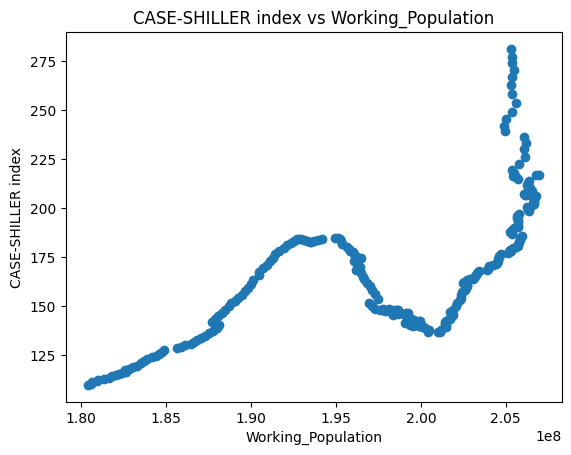

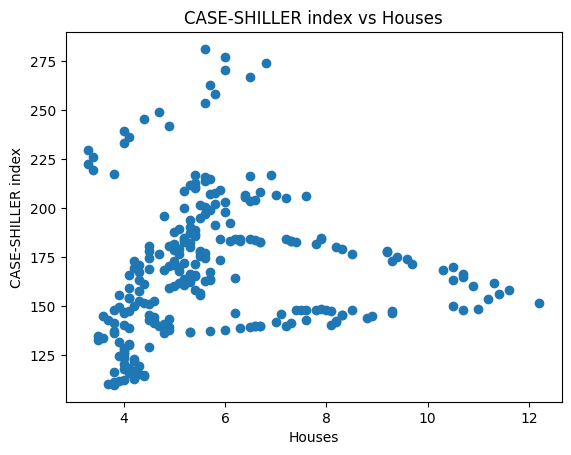

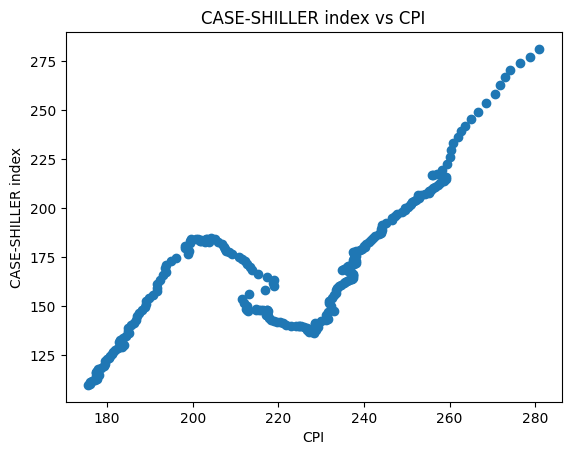

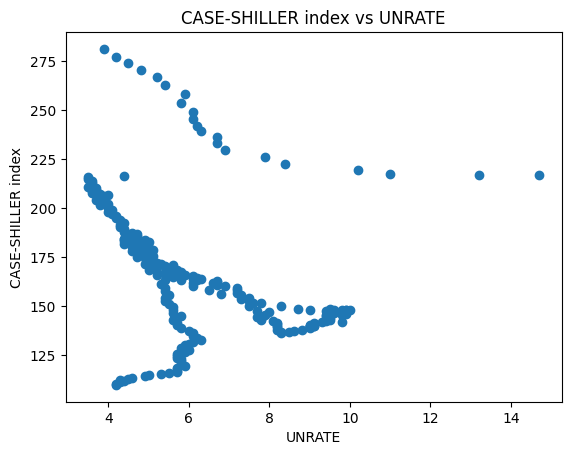

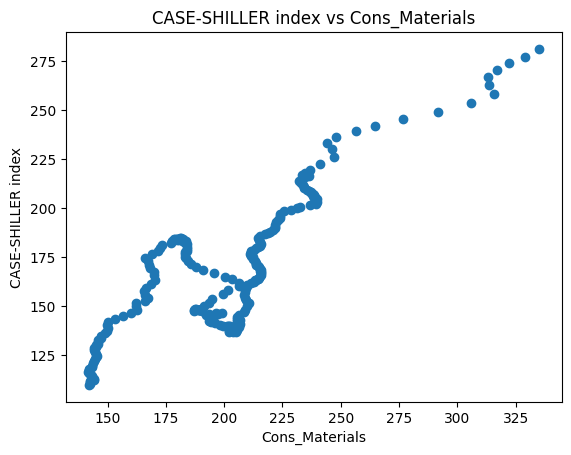

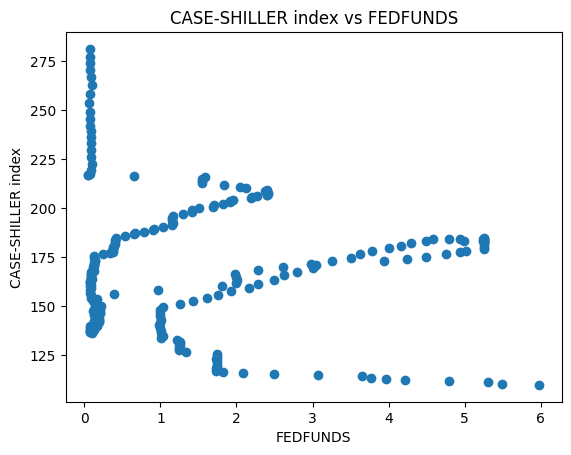

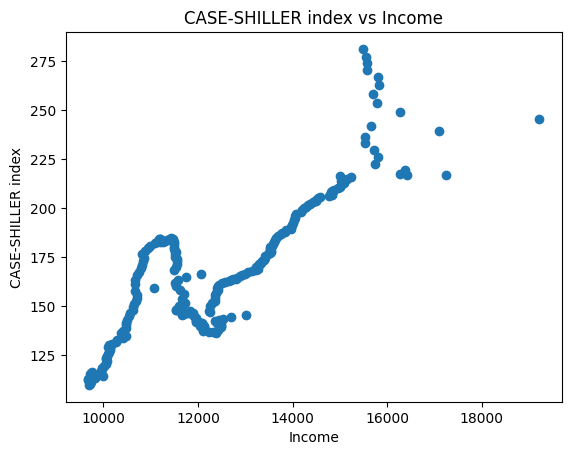

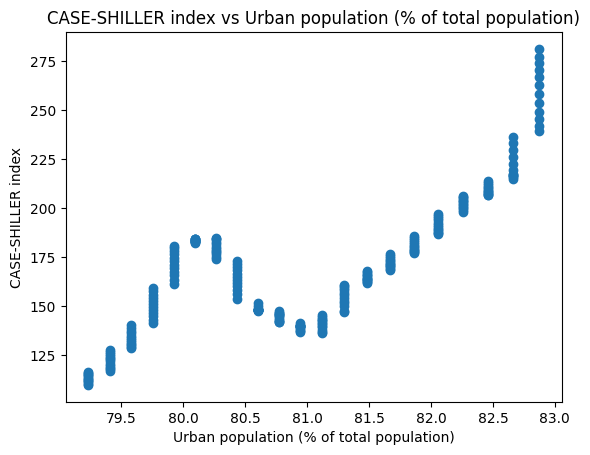

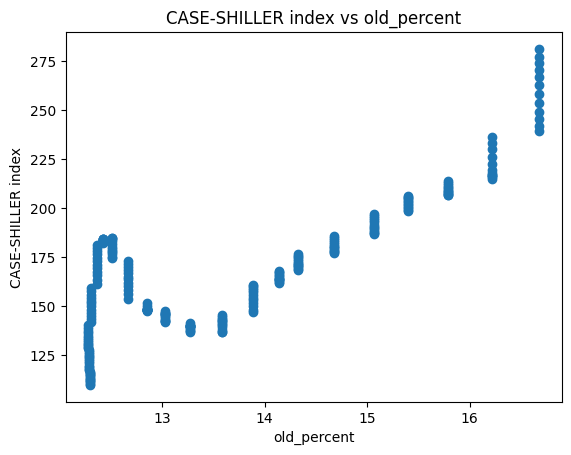

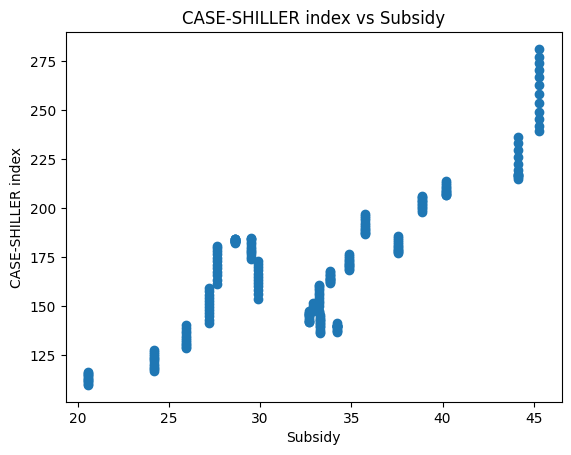

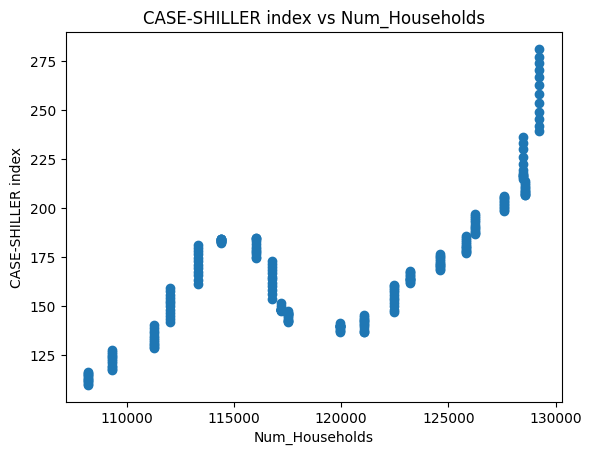

In [279]:
# Plotting scatter plots of the CASE-SHILLER index vs features

for feature in X.columns:
    plt.figure()
    plt.scatter(X[feature], y)
    plt.xlabel(feature)
    plt.ylabel("CASE-SHILLER index")
    plt.title(f"CASE-SHILLER index vs {feature}")


**Multivariate Analysis**

In [280]:
# Correlation
df.corr()

,Per_Capita_GDP,Working_Population,Houses,CPI,UNRATE,Cons_Materials,FEDFUNDS,Income,Urban population (% of total population),old_percent,Subsidy,Num_Households
Per_Capita_GDP,1.000000,0.879544,0.045221,0.942317,-0.278247,0.929984,-0.242670,0.935648,0.944471,0.922620,0.917551,0.939343
Working_Population,0.879544,1.000000,0.194193,0.956491,0.060001,0.864362,-0.487026,0.879732,0.942796,0.831670,0.911068,0.965478
Houses,0.045221,0.194193,1.000000,0.099572,0.181845,0.133502,0.096772,0.004784,0.027245,-0.117271,0.084622,0.044187
CPI,0.942317,0.956491,0.099572,1.000000,-0.011777,0.955146,-0.470461,0.955989,0.990150,0.940835,0.965860,0.987500
UNRATE,-0.278247,0.060001,0.181845,-0.011777,1.000000,-0.043804,-0.543232,-0.048318,-0.044274,-0.134079,0.062251,-0.056309
Cons_Materials,0.929984,0.864362,0.133502,0.955146,-0.043804,1.000000,-0.410699,0.916600,0.931725,0.905261,0.935195,0.913128
FEDFUNDS,-0.242670,-0.487026,0.096772,-0.470461,-0.543232,-0.410699,1.000000,-0.399286,-0.469024,-0.418151,-0.484417,-0.466383
Income,0.935648,0.879732,0.004784,0.955989,-0.048318,0.916600,-0.399286,1.000000,0.972901,0.968811,0.964204,0.953118
Urban population (% of total population),0.944471,0.942796,0.027245,0.990150,-0.044274,0.931725,-0.469024,0.972901,1.000000,0.967912,0.970665,0.993752
old_percent,0.922620,0.831670,-0.117271,0.940835,-0.134079,0.905261,-0.418151,0.968811,0.967912,1.000000,0.934620,0.942498


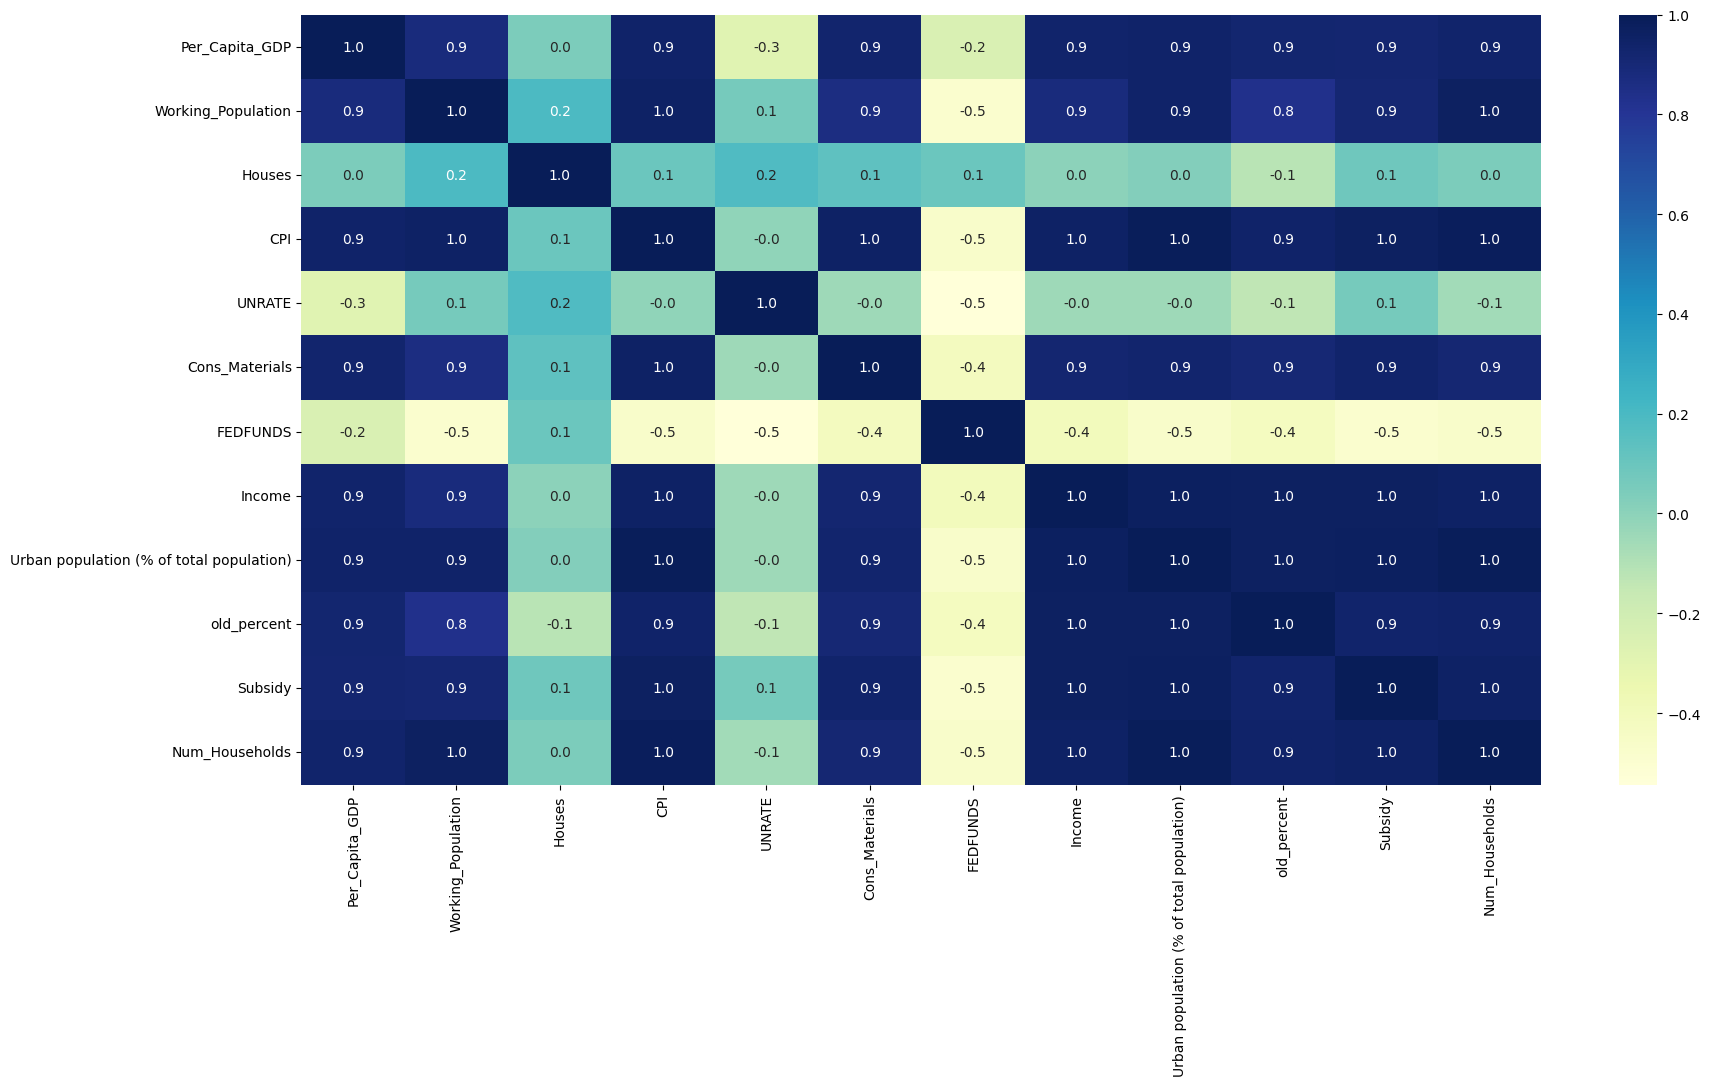

In [281]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.heatmap(df.corr(), annot=True, fmt=".1f" ,cmap="YlGnBu", cbar=True)

# (E) Scaling factors

In [282]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [283]:
# Scaling
scalar = MinMaxScaler()
X = scalar.fit_transform(X)

# (F) Model Building

In [284]:
# Splitting data into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size= 0.2, random_state= 42)

 **Linear Regression Model**

In [285]:
# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_valid)
score = r2_score(y_valid, pred)
print("The r2_score for the validation set is: ", score)
score1 = mean_squared_error(y_valid, pred)
print("The mean squared error for the validation set is: ", score1)

The r2_score for the validation set is:  0.8882680627079924
The mean squared error for the validation set is:  102.27174378159737


Random Forest

In [286]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor model
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
pred_rf = model_rf.predict(X_valid)
score_rf = r2_score(pred_rf, y_valid)
print("R2 score for Random Forest Regressor: ", score_rf)
score2 = mean_squared_error(y_valid, pred_rf)
print("The mean squared error for the validation set is: ", score2)


R2 score for Random Forest Regressor:  0.9986581831516599
The mean squared error for the validation set is:  1.2179038891313145


XGboost

In [287]:
from xgboost import XGBRegressor

# Create an XGBoost Regressor model
model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)
pred_xgb = model_xgb.predict(X_valid)
score_xgb = r2_score(pred_xgb, y_valid)
print("R2 score for XGBoost Regressor: ", score_xgb)
score3 = mean_squared_error(y_valid, pred_xgb)
print("The mean squared error for the validation set is: ", score3)

R2 score for XGBoost Regressor:  0.9962563750325153
The mean squared error for the validation set is:  3.4213652592921258


SVM

In [288]:
from sklearn.svm import SVR

# Create a Support Vector Regression model
model_svr = SVR()
model_svr.fit(X_train, y_train)
pred_svr = model_svr.predict(X_valid)
score_svr = r2_score(pred_svr, y_valid)
print("R2 score for Support Vector Regression: ", score_svr)
score4 = mean_squared_error(y_valid, pred_svr)
print("The mean squared error for the validation set is: ", score4)

R2 score for Support Vector Regression:  -0.06192615358450304
The mean squared error for the validation set is:  314.5810535545345


**Neural Network**

In [289]:
# using TensorFlow/Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_nn = Sequential()
model_nn.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model_nn.add(Dense(1))  # Output layer

model_nn.compile(optimizer='adam', loss='mean_squared_error')
model_nn.fit(X_train, y_train, epochs=300, batch_size=16)

pred_nn = model_nn.predict(X_valid)
score_nn = r2_score(pred_nn, y_valid)
print("R2 score for Neural Network: ", score_nn)
score5 = mean_squared_error(y_valid, pred_nn)
print("The mean squared error for the validation set is: ", score5)

Epoch 1/300
13/13 [==============================] - 1s 3ms/step - loss: 30449.9531
Epoch 2/300
13/13 [==============================] - 0s 3ms/step - loss: 30282.3828
Epoch 3/300
13/13 [==============================] - 0s 3ms/step - loss: 30114.4180
Epoch 4/300
13/13 [==============================] - 0s 3ms/step - loss: 29912.3203
Epoch 5/300
13/13 [==============================] - 0s 3ms/step - loss: 29666.0332
Epoch 6/300
13/13 [==============================] - 0s 3ms/step - loss: 29377.7109
Epoch 7/300
13/13 [==============================] - 0s 3ms/step - loss: 29050.3906
Epoch 8/300
13/13 [==============================] - 0s 3ms/step - loss: 28692.2891
Epoch 9/300
13/13 [==============================] - 0s 3ms/step - loss: 28288.3789
Epoch 10/300
13/13 [==============================] - 0s 3ms/step - loss: 27833.2344
Epoch 11/300
13/13 [==============================] - 0s 3ms/step - loss: 27326.5098
Epoch 12/300
13/13 [==============================] - 0s 3ms/step - loss: 

In [290]:
#Printing the regression coefficients of different variables
coefs = model_rf.feature_importances_
cols = df.columns
for i in range(len(coefs)):
    print(f"The coefficient for {cols[i]} is {coefs[i]}")

The coefficient for Per_Capita_GDP is 0.04028711137213145
The coefficient for Working_Population is 0.018962817174650634
The coefficient for Houses is 0.003132214682222873
The coefficient for CPI is 0.2616350607267788
The coefficient for UNRATE is 0.10817398662235028
The coefficient for Cons_Materials is 0.12195693317447845
The coefficient for FEDFUNDS is 0.0034589259219710332
The coefficient for Income is 0.31231872799883054
The coefficient for Urban population (% of total population) is 0.06160851627124974
The coefficient for old_percent is 0.02255441703150946
The coefficient for Subsidy is 0.016181341728650992
The coefficient for Num_Households is 0.029729947295175668
